## Final Project Submission

Please fill out:
* Student name: ALFRED RICKY OTIENO
* Student pace: PART TIME
* Scheduled project review date/time: 
* Instructor name: Daniel Ekale
* Blog post URL:



#### Step 1: **Introduction**
The primary aim of this project is to provide data-driven insights for a company looking to establish a new movie studio. With the entertainment industry evolving, the goal is to analyze existing film data to understand what types of movies perform best at the box office, helping the studio decide which genres, contributors, and themes to prioritize.



#### Step 2: **Objectives**
Our analysis will focus on the following objectives:

1. **Identify Popular Genres**: Analyze which genres tend to have higher ratings and more viewer engagement.
2. **Analyze Characteristics of High-Rated Movies**: Examine factors such as runtime, year of release, and genre combinations to see if they correlate with higher ratings.
3. **Determine Key Contributors**: Identify directors, writers, and actors who have contributed to successful movies, as potential partners for the new studio.
4. **Investigate Trends Over Time**: Look at how preferences in ratings, movie length, and genres have evolved over the years, highlighting trends that may be valuable for the new studio to consider.




#### Step 3: **Business Problem:**  
The company needs guidance on what types of films to produce in order to maximize success and minimize risk. Your task is to provide data-backed recommendations on movie genres, lengths, themes, contributors (like popular directors or actors), and other key characteristics that correlate with successful films.



#### Step 4: **Data Understanding**


**Key Questions for Data Understanding**:
- What is the distribution of genres in the dataset?
- Are there missing values in critical columns (e.g., ratings, genres, runtime)?
- How are ratings distributed across movies?
- What are the relationships between tables that can help us analyze contributor impact (e.g., directors, writers)?



In [1]:
#install all libraries to be used
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import scipy.stats as st
import sqlite3
import zipfile
import os
import statsmodels.api as sm
from statsmodels.stats.power import TTestIndPower, TTestPower
import statsmodels.formula as smf
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

#### **Data Loading and Initial Display**

Now that we’ve defined our objectives, let’s load the data and display the initial structure. I'll execute this step to provide a snapshot of each table’s structure.

In [2]:
# Define paths
zip_file_path = "C:\Projects\group3-phase2-project\data\im.db.zip"  
extracted_dir = "C:\Projects\group3-phase2-project\data\extracted"  

In [3]:
# Step 1: Unzip the file
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(extracted_dir)

In [4]:
# Define the path to the extracted database file
db_path = os.path.join(extracted_dir, "im.db")

In [5]:
# Step 2: Check if the database file exists and connect to it
if os.path.exists(db_path) and os.path.getsize(db_path) > 0:
    # Connect to the SQLite database
    conn = sqlite3.connect(db_path)

In [6]:
# Step 3: Check if the database file exists and has a reasonable size
if os.path.exists(db_path) and os.path.getsize(db_path) > 0:
    print("Database file exists and is not empty. Proceeding with connection.")
    
    # Connect to the SQLite database
    conn = sqlite3.connect(db_path)
    
    # Step 3: Check tables in the database
    tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
    
    if tables.empty:
        print("No tables found in the database. The database might be empty or corrupted.")
    else:
        print("Tables found:", tables)
else:
    print("Database file is either missing or empty.")

Database file exists and is not empty. Proceeding with connection.
Tables found:             name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [7]:
# Step 4: Load tables into DataFrames for analysis
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics;", conn)
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings;", conn)
principals = pd.read_sql_query("SELECT * FROM principals;", conn)
persons = pd.read_sql_query("SELECT * FROM persons;", conn)
known_for = pd.read_sql_query("SELECT * FROM known_for;", conn)
directors = pd.read_sql_query("SELECT * FROM directors;", conn)
writers = pd.read_sql_query("SELECT * FROM writers;", conn)
movie_akas = pd.read_sql_query("SELECT * FROM movie_akas;", conn)

In [8]:
# Display brief info summary for each DataFrame
dataframes_info = {
        "movie_basics": movie_basics.info(),
        "movie_ratings": movie_ratings.info(),
        "principals": principals.info(),
        "persons": persons.info(),
        "known_for": known_for.info(),
        "directors": directors.info(),
        "writers": writers.info(),
        "movie_akas": movie_akas.info()
    }
    
dataframes_info  # This will display summaries for all loaded tables


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entr

{'movie_basics': None,
 'movie_ratings': None,
 'principals': None,
 'persons': None,
 'known_for': None,
 'directors': None,
 'writers': None,
 'movie_akas': None}

### **Data Preparation**
Let’s start with data preparation. We’ll focus on cleaning and organizing the data to make it ready for analysis.

#### **Step 1: Handle Missing Values**

  * Check for missing values in each table.
  * Based on our objectives, we’ll focus on the columns critical to genre, style, theme, and ratings analysis.

In [9]:
# Display missing values for each DataFrame
print("Missing Values Summary:")
for df_name, df in zip(["movie_basics", "movie_ratings"], [movie_basics, movie_ratings]):
    print(f"{df_name} missing values:\n{df.isnull().sum()}\n")


Missing Values Summary:
movie_basics missing values:
movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

movie_ratings missing values:
movie_id         0
averagerating    0
numvotes         0
dtype: int64



### Step 1: Handling Missing Values in `movie_basics`

Here’s what we have:
1. **`runtime_minutes`**: 31,739 missing values.
2. **`genres`**: 5,408 missing values.
3. **`original_title`**: 21 missing values.

This is how we will handle each of these:

#### 1.1 `runtime_minutes`
- **Objective Relevance**: `runtime_minutes` can be a useful feature for understanding trends in movie characteristics, but it's not the primary focus for genres and ratings.
- **Recommended Action**: Since `runtime_minutes` has a large number of missing values, we should fill these with the median runtime rather than drop rows, which would reduce our dataset significantly.

#### 1.2 `genres`
- **Objective Relevance**: `genres` is essential for your objectives, as it’s directly tied to analyzing genre trends and popularity.
- **Recommended Action**: For rows with missing `genres`, fill these with `"Unknown"` to retain them for analysis, as removing these rows might lead to losing valuable data.

#### 1.3 `original_title`
- **Objective Relevance**: `original_title` is less relevant for your objectives since `primary_title` is also available and doesn’t have missing values.
- **Recommended Action**: We can simply ignore missing values in `original_title` for this analysis or consider dropping the column if it's not used.



In [10]:
# 1. Fill missing `runtime_minutes` with the median runtime
runtime_median = movie_basics['runtime_minutes'].median()
movie_basics['runtime_minutes'].fillna(runtime_median, inplace=True)

# 2. Fill missing `genres` with "Unknown"
movie_basics['genres'].fillna('Unknown', inplace=True)

# 3. Optional: Drop `original_title` if it’s not needed for this analysis
movie_basics.drop(columns=['original_title'], inplace=True)

# Verify that missing values have been handled
print("After handling missing values in movie_basics:")
print(movie_basics.isnull().sum())


After handling missing values in movie_basics:
movie_id           0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


### Explanation of Each Step in the Code
- **`runtime_minutes`**: We calculate the median runtime and use `fillna()` to replace any missing values with this median. This ensures that the runtime field is complete without skewing the data.
- **`genres`**: We fill missing genres with `"Unknown"` to avoid removing potentially useful rows.
- **`original_title`**: Since it’s not essential for the current objectives, we drop it using `drop(columns=['original_title'])`.





### Step 2: Data Formatting and Type Conversion

#### Objectives
In this step, we’ll:
1. **Convert `start_year` to an integer**: `start_year` represents the release year, which is better suited as an integer type for any time-based analysis.
2. **Convert `genres` to categorical**: `genres` is a categorical variable. Converting it to a categorical data type improves processing efficiency and makes it easier to use in analysis.


In [11]:
# Convert start_year to integer, handling any potential issues with invalid entries
movie_basics['start_year'] = pd.to_numeric(movie_basics['start_year'], errors='coerce').fillna(0).astype(int)

# Convert genres to categorical type for efficient processing
movie_basics['genres'] = movie_basics['genres'].astype('category')

# Check data types after conversion to confirm
print("Data Types after conversion:")
print(movie_basics.dtypes)


Data Types after conversion:
movie_id             object
primary_title        object
start_year            int32
runtime_minutes     float64
genres             category
dtype: object



### Step 3: Feature Engineering

The primary focus is on analyzing genres. To perform genre-specific analysis, it’s beneficial to split these genres into individual entries. This way, each genre can be treated independently, allowing us to analyze trends, popularity, and ratings by genre.

#### Objectives
1. **Split `genres`**: Separate the `genres` column into individual genre entries. This will create multiple rows for movies that belong to more than one genre.
2. **Merge with `movie_ratings`**: Later, we’ll merge this split dataset with `movie_ratings` to analyze ratings for each genre.





In [12]:
# Step 1: Split genres by comma and explode into separate rows
movie_basics['genres'] = movie_basics['genres'].str.split(',')  # Split by comma
genres_exploded = movie_basics.explode('genres')  # Expand each genre into its own row

# Step 2: Clean up whitespace around genre names (if any)
genres_exploded['genres'] = genres_exploded['genres'].str.strip()

# Display a sample of the exploded DataFrame to verify the results
print("Sample of genres_exploded DataFrame:\n", genres_exploded[['movie_id', 'primary_title', 'genres']].head())


Sample of genres_exploded DataFrame:
     movie_id                    primary_title     genres
0  tt0063540                        Sunghursh     Action
0  tt0063540                        Sunghursh      Crime
0  tt0063540                        Sunghursh      Drama
1  tt0066787  One Day Before the Rainy Season  Biography
1  tt0066787  One Day Before the Rainy Season      Drama


### Step 4: Merge `genres_exploded` with `movie_ratings`

Now, we're merging `genres_exploded` with the `movie_ratings` DataFrame. This will allow us to associate each genre with its corresponding movie ratings, enabling us to analyze popularity and high-rated genres.

#### Objectives
1. **Merge DataFrames**: Merge `genres_exploded` with `movie_ratings` on `movie_id` to create a comprehensive dataset for genre-based rating analysis.
2. **Check Merge Results**: Verify the merged DataFrame to ensure it includes `averagerating` and `numvotes` alongside the genres.



In [13]:
# Merge genres_exploded with movie_ratings on movie_id
movie_data = genres_exploded.merge(movie_ratings, on="movie_id", how="inner")

# Display a sample of the merged DataFrame to verify
print("Sample of merged movie_data:\n", movie_data[['movie_id', 'primary_title', 'genres', 'averagerating', 'numvotes']].head())


Sample of merged movie_data:
     movie_id                    primary_title     genres  averagerating  \
0  tt0063540                        Sunghursh     Action            7.0   
1  tt0063540                        Sunghursh      Crime            7.0   
2  tt0063540                        Sunghursh      Drama            7.0   
3  tt0066787  One Day Before the Rainy Season  Biography            7.2   
4  tt0066787  One Day Before the Rainy Season      Drama            7.2   

   numvotes  
0        77  
1        77  
2        77  
3        43  
4        43  



### Step 5: Exploratory Data Analysis (EDA)

With `movie_data` prepared, let’s dive into EDA to address our objectives:

1. **Identify trends in genres, styles, and themes**: We’ll explore genre distributions, trends over time, and average ratings per genre.
2. **Identify popular and high-rated genres**: We’ll calculate the average rating per genre and explore the frequency of high-rated movies (e.g., movies with ratings above a threshold) within each genre.

#### EDA Outline

- **Univariate Analysis**: Look at the distribution of genres and ratings.
- **Bivariate Analysis**: Analyze average ratings by genre to identify popular genres.
- **Multivariate Analysis**: Analyze how genre ratings have changed over time, which will show genre popularity trends.



#### 5.1 Univariate Analysis

**Objective**: Understand the distribution of genres and average ratings.


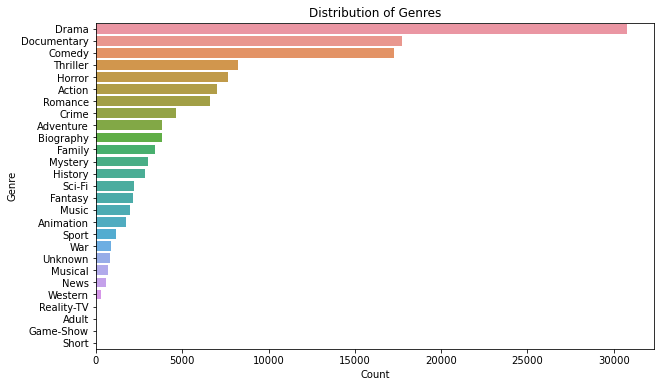

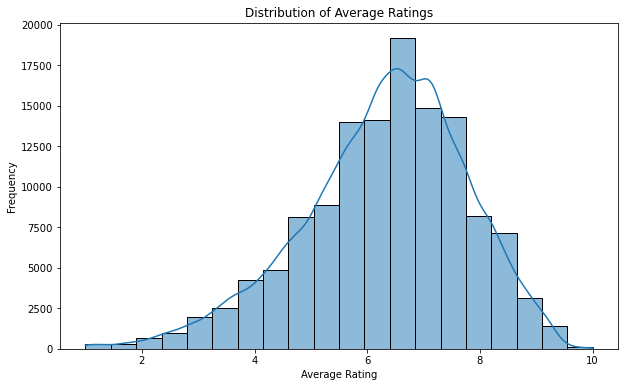

In [14]:

# Plot the genre distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=movie_data, y='genres', order=movie_data['genres'].value_counts().index)
plt.title("Distribution of Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

# Plot the distribution of average ratings
plt.figure(figsize=(10, 6))
sns.histplot(movie_data['averagerating'], bins=20, kde=True)
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.show()


**Explanation**:
- The genre distribution plot shows which genres are most common in the dataset.
- The ratings distribution plot gives us a sense of how average ratings are spread across movies, helping us understand overall rating patterns.

#### 5.2 Bivariate Analysis

**Objective**: Identify popular genres based on average ratings.


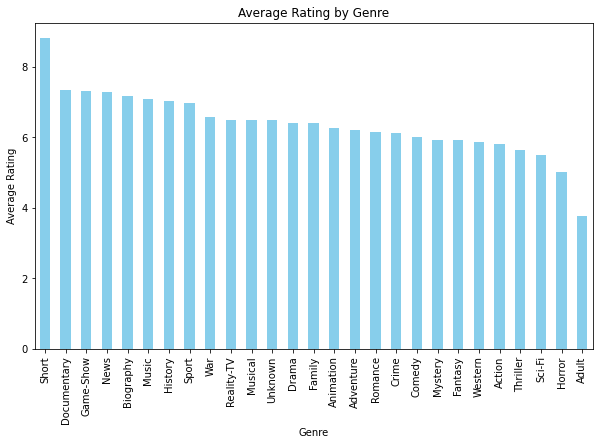

In [16]:

# Calculate the average rating by genre
average_rating_by_genre = movie_data.groupby('genres')['averagerating'].mean().sort_values(ascending=False)

# Plot average rating by genre
plt.figure(figsize=(10, 6))
average_rating_by_genre.plot(kind='bar', color='skyblue')
plt.title("Average Rating by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.show()



**Explanation**:
- This plot displays the average rating for each genre, allowing us to see which genres tend to receive higher ratings.  We will flag High-rated genres as popular, aligning with our objective of identifying well-rated movie types.



#### 5.3 Multivariate Analysis

**Objective**: Analyze how genre popularity has evolved over time by calculating the average rating per genre per year.

```python
# Calculate the average rating by genre and year
genre_yearly_ratings = movie_data.groupby(['start_year', 'genres'])['averagerating'].mean().unstack()

# Select a few popular genres to plot over time
selected_genres = ['Drama', 'Comedy', 'Action', 'Documentary', 'Horror']  # Adjust based on genre distribution
genre_yearly_ratings[selected_genres].plot(figsize=(12, 8))
plt.title("Average Rating Trends by Genre Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.legend(title="Genre")
plt.show()
```

**Explanation**:
- This plot shows the trend in average ratings for selected genres over time, which will help us observe any changes in genre popularity.
- By analyzing these trends, we can identify whether certain genres have become more or less popular, directly addressing the objective to explore trends in genres, styles, and themes.

---

### Summary of EDA Steps

1. **Univariate Analysis**: The distribution plots for genres and ratings provide an overview of genre prevalence and rating patterns.
2. **Bivariate Analysis**: The bar plot of average ratings by genre identifies which genres receive high ratings, flagging popular genres.
3. **Multivariate Analysis**: The trend plot for average ratings by genre over time highlights how genre popularity and audience preferences may have shifted.

### Next Steps
- **Run each of these code blocks** in your notebook to perform the EDA.
- **Interpret the plots and findings** based on your objectives to identify trends and popular genres.
  
Once you complete this EDA, let me know if you'd like any further analysis or have specific questions on the results!